AAI-501 Group 7 Notebook

Data Set Selection 

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


In [594]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

#join the features and target variable into a singe dataframe for EDA
df = X.join(y)
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables)

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

Setup

In [595]:
import pandas as pd
from summarytools import dfSummary
from scipy import stats
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display, Markdown
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import math
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer, FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler, KBinsDiscretizer


EDA

In [596]:
# The target variable is categorical, so we need to change it to numerical for the model. 
# Favorable outcomes are 'Graduate' and 'Enrolled', while 'Dropout' is unfavorable. 
# We will change the target variable to numerical, where 1 is favorable and 0 is unfavorable.

# change the target variable to numerical
mapping = {'Graduate': 1, 'Enrolled': 1, 'Dropout': 0}
df['Target_Num'] = df['Target'].map(mapping)
df = df.drop(['Target'], axis=1)
df.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Num
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [597]:
# create a new dataset y with Target_Num as the target variable
y = df['Target_Num']
y = pd.DataFrame(y)
print(y)

      Target_Num
0              0
1              1
2              0
3              1
4              1
...          ...
4419           1
4420           0
4421           0
4422           1
4423           1

[4424 rows x 1 columns]


In [598]:
dfSummary(X)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Marital Status[int64],1. 12. 23. 44. 55. 66. 3,"3,919 (88.6%)379 (8.6%)91 (2.1%)25 (0.6%)6 (0.1%)4 (0.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAClElEQVR4nO3dMW7acBjG4c8Ipc1ihCzlCO0dfIgctofgEL0DQngoaRY6hFRtpwL2S2SeZ8uC/sNPdrD8Js3xeCxIWNz6ANwPsREjNmLERkxTVY9V9XDrg/ChvR6Px8O1H7Lsuu65bdv1GCdinoZh2DVN8+3a4JZt2677vj+sVquXsQ7HfOz3+8+bzWa93W4fquq62KqqVqvVy9PT049RTsccPY7xIb4gECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxy6q310hufRA+pjHbWA7DsNtsNusa6TUS5mcYhl1VvV77OV4L53+M8lp4Y6RMyqVXtlFK575cNHgZawDBfTl78DLmAIL7cungxTdXzuahLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZizl5XWWJxqYvWVWOtbbgvNgjEWFcR8++VzRWLyfy1rrKaYkqL93VV3/eHU3TW8Uzi97rq9LPVFJPxUJcYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMf53FTF/rqusppiUDQIx1lXEvF/ZyhWNqS27rnuuqrKqYmqLtm3XVlUkeM5GjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEbM8jVyqDF2YmNfCiTF4IcbvbMSIjZhF0zRfm6bx5xeY3KKqvlTVp1sfhPlzGyVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIWVTV96r6eeuDMH8GL8S4jRIjNmIMXogxeCHGbZQYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEWFcRY11FjNsoMWIjRmzEiI2YX6j6tzp2H/3EAAAAAElFTkSuQmCC"">",0(0.0%)
2,Application mode[int64],Mean (sd) : 18.7 (17.5)min < med < max:1.0 < 17.0 < 57.0IQR (CV) : 38.0 (1.1),18 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACX0lEQVR4nO3cvY7aQBSG4TPhRwZWNogIOrcUkVJQ0uQOcrFp06WgR+IO6JAAG0GWAMYpUmRThI3NOnzY79OuxqDVK5uxjsalaWqAinf3/gLAS/Vrf3TOtcysmfPaxzRNn3OuRUX9NUjnXKvf73/2fb+X58Lb7XbjnPtClMji2h2y6ft+bzKZPAdBcMhy0TiOvel02lutVk0zI0j8s6uPbDOzIAgOg8Hge45rt3KsQcWxqYEUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoSUVw8KuAfOFKouuSA5U6ja5II0zhSqNMUgzYwzhaqKTQ2kyN4hq4RN3G8EeWds4v5EkPfHJu4FghTBJu4XNjWQQpCQQpCQwm/IB5ckScPMfOdcnuVyr4wI8oHt9/vG6XT6GIZhrVarZdqhm2m+MiLIB3Y8Huue57XH4/FhOBxusqxVfWVEkCXQ6XRK88qITQ2kECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkFDZcccOcnn+5XBoFfCU8gEKCvGVO73Q6eUmSfDgcDt/MLPMES9kGVqumkCBvmdNbLBa9+XzePp/PtayfW8aB1aopdB4yz5zeZrPJPaNXxoHVIik+TUo5oFumgdWi3Po0iaJo55z7amaZ19qVmF8NMo5jL+un7XY7z8xsv997y+Wy/Qhr4zj2kiSpW/47Rl7+5XKp/+//83q9fvI8rz0ajVy32/2RZW0URU+z2exTGIbv3/qn0U/mSzXiF6YDjwAAAABJRU5ErkJggg=="">",0(0.0%)
3,Application order[int64],1. 12. 23. 34. 45. 56. 67. 98. 0,"3,026 (68.4%)547 (12.4%)309 (7.0%)249 (5.6%)154 (3.5%)137 (3.1%)1 (0.0%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cQW7bVgBF0U/DSJuJBMOAl9DuwYvoYrsILaJ7MAxz0KSZqIMOY8dyRF5C6jkr+ECuSXyBL9PxeBxQuNn6APx/iI2M2MiIjYzYyIiNzDTG+DzG+LT1QXjXt+Px+GXrQ5zj9v7+/o/dbne39UH4sXmen6dp+vOSg7vd7XZ3j4+PX/b7/detD8PrXl5efj0cDndPT0+fxhiXG9sYY+z3+68PDw9/b30Yfujz1gc4lwsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmdsx/vuEZeuD8LZr+fe5nef5+XA43I0r+ITlms3z/DzG+Lb1Oc7hs/DLcfGfhU/++wUqSz/ZLv6vj/UsOni5hlEG61ls8HItowzWs/TgxY2WN/lRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxig5drGWWwnkUHL9cwymA9PgsnY/BCxgWBzEdfo16T/LQPrauspzjHyesq6ynO9dF1lfUUP80FgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczJ6yrrKc71oXWV9RTn8Fk4GesqMqc+2TzRONtJgxdDF5bw7uDF0IWlnDp4MXThbH7UJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI/Pu4MXQhaWcNHgxdGEJPgsnY/BCxgWBzFuvUa9NFvfqusqaijV8t66ypmItb62rrKlYnAsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbme/WVdZUrOXVdZU1FWvwWTgZ6yoynmxkDF7IGLyQMXgh40ddMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjA0CGesqMi4IZG6mafp9miaXAlZ3M8b4bYzxy9YH4fp5jZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbkZY/w1xvhn64Nw/WwQyHiNkhEbGYMXMgYvZLxGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyXqNkxEZGbGTERkZsZMRG5l+SvE5kLbBQDgAAAABJRU5ErkJggg=="">",0(0.0%)
4,Course[int64],Mean (sd) : 8856.6 (2063.6)mi

In [599]:
dfSummary(y)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Target_Num[int64],1. 12. 0,"3,003 (67.9%)1,421 (32.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABPElEQVR4nO3bMWrDQBCF4dkgTNzsIgQ6jA6Rw+YQexshNEVs3GyKlInTOLyNxv93ggH/NljopdaaAQrJzM5mdup9CH51a61deh/xqGGaprec89j7ENzn7ltK6f3owQ0553FZlksp5dr7GHy37/trrXVc1/VkZseOzcyslHKd5/mj9zG469z7gL/w0vsAPA9igwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkBrOvF/R6H4KfRfpsBnffaq2jBXlBLyJ338zs1vuORzF4OYYQg5fElA8qkX7ZQnz7Iwsz5Ysyd4ssxJQv0twtskhTPv5N/3M81IUMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMiGmfEe//1mEmfJFmbtFxuAFMp8KW2rfQ8ExzwAAAABJRU5ErkJggg=="">",0(0.0%)


In [600]:
#check for duplicates
df.duplicated().sum()


np.int64(0)

In [601]:
df.shape

(4424, 37)

Summary:

1. Categorical column Target changed to numerical column Target_Num
2. No missing values in the dataset
3. No duplicates in the dataset
4. There are 37 columns (features) including the target feature
5. Thre are 4424 rows.

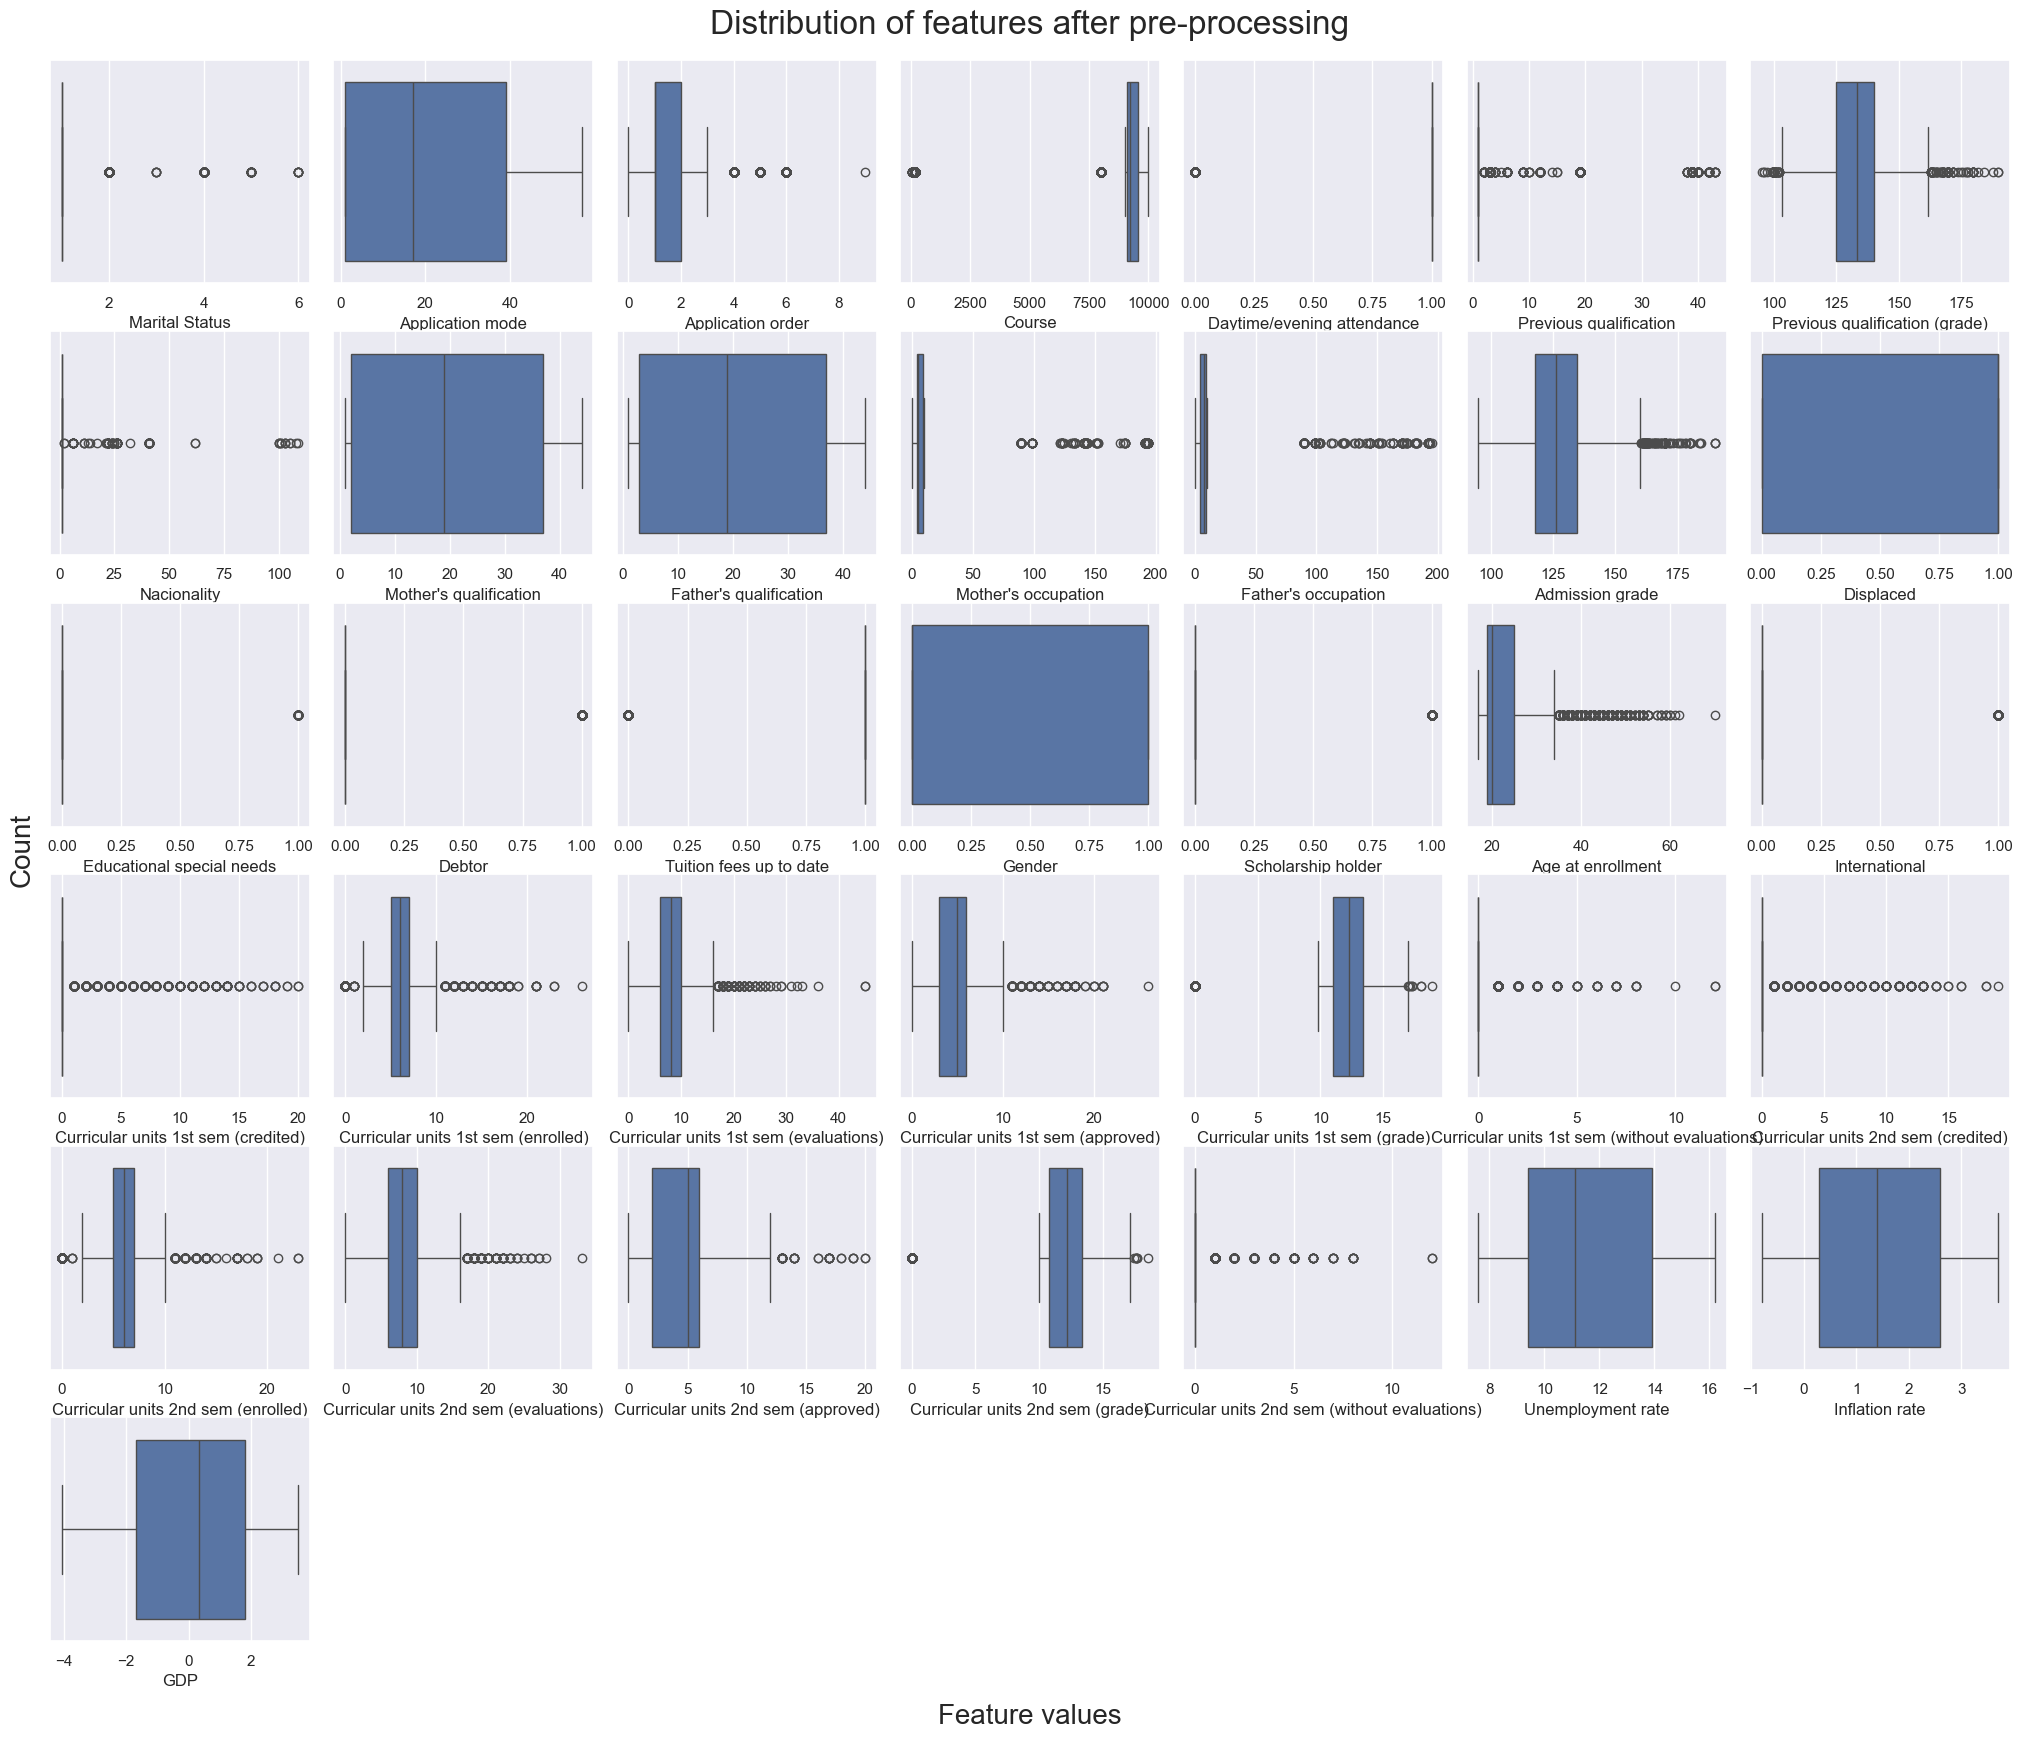

In [602]:
def plot_feature_distributions(data, n_cols=3):
    
    n_rows = int(np.ceil(data.shape[1] / n_cols))
    width = 20
    height = width*n_rows/n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(width, height))
    fig.suptitle('Distribution of features after pre-processing', fontsize=24, y=0.99)
    
    for i, col in enumerate(data.columns):
        ax = axes[i // n_cols, i % n_cols]
        g = sns.boxplot(x=data[col], ax=ax)
        g.set_ylabel('')
        ax.set(yticklabels=[])
        ax.tick_params(left=False)
        last_i = i

    for i in range(last_i + 1, n_rows * n_cols):
        fig.delaxes(axes[i // n_cols, i % n_cols])

    fig.text(-0.01, 0.5, 'Count', va='center', rotation='vertical', fontsize=20)
    fig.text(0.5, -0.01, 'Feature values', ha='center', fontsize=20)

    plt.tight_layout(h_pad=0, w_pad=0.5)
    plt.show()

plot_feature_distributions(X, n_cols=7)

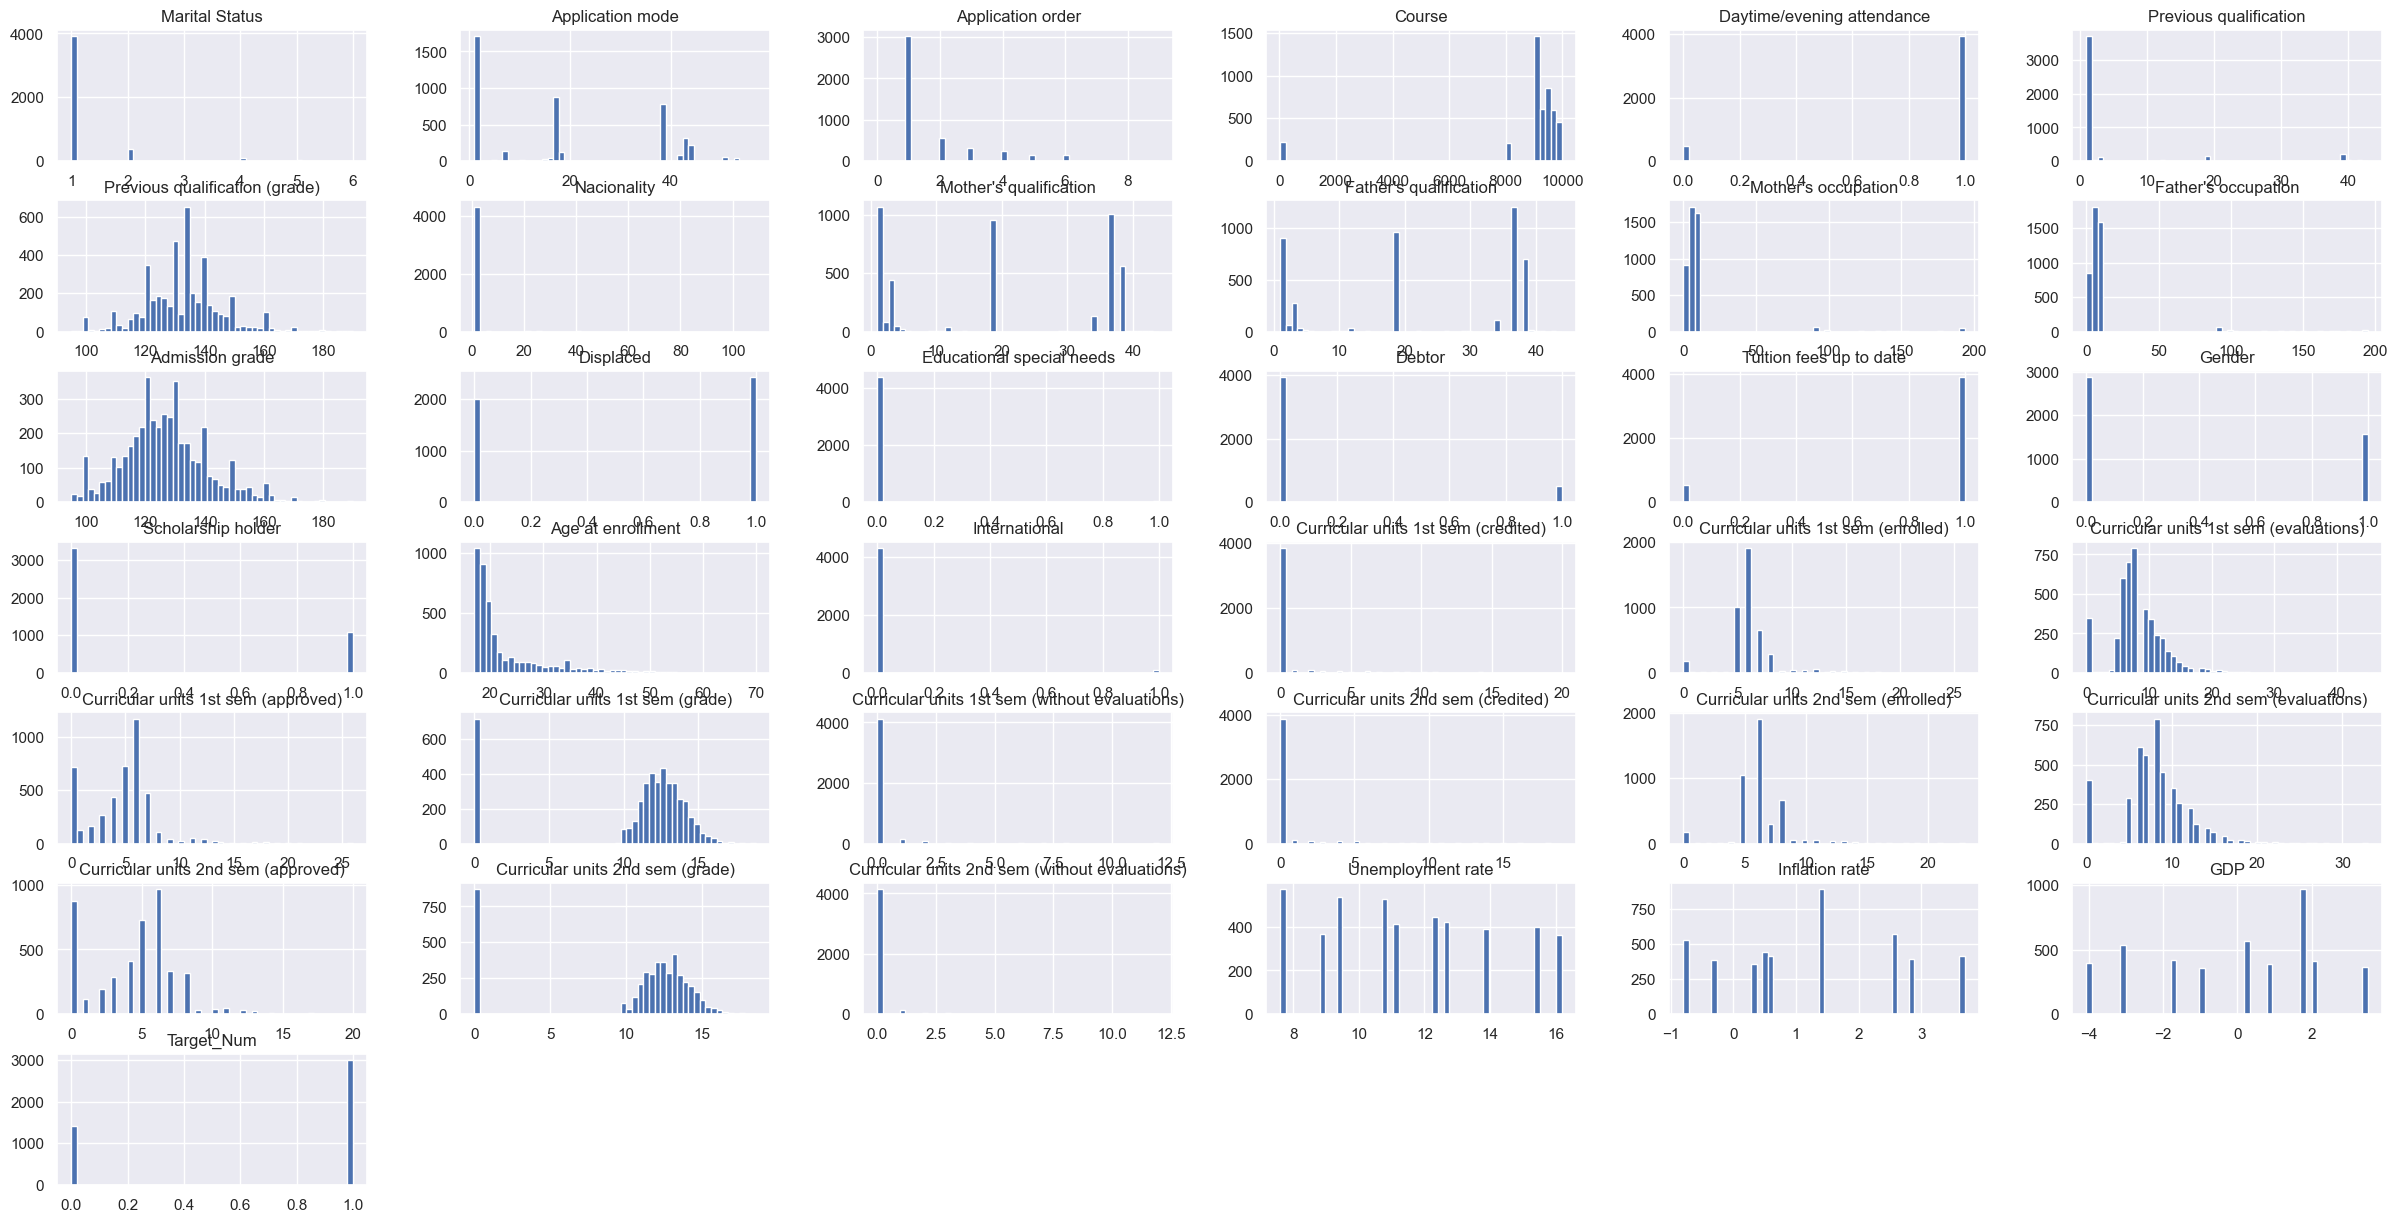

In [603]:
# Histograms for numerical columns
df.hist(bins=50, figsize=(30, 15))
plt.show()


<Axes: >

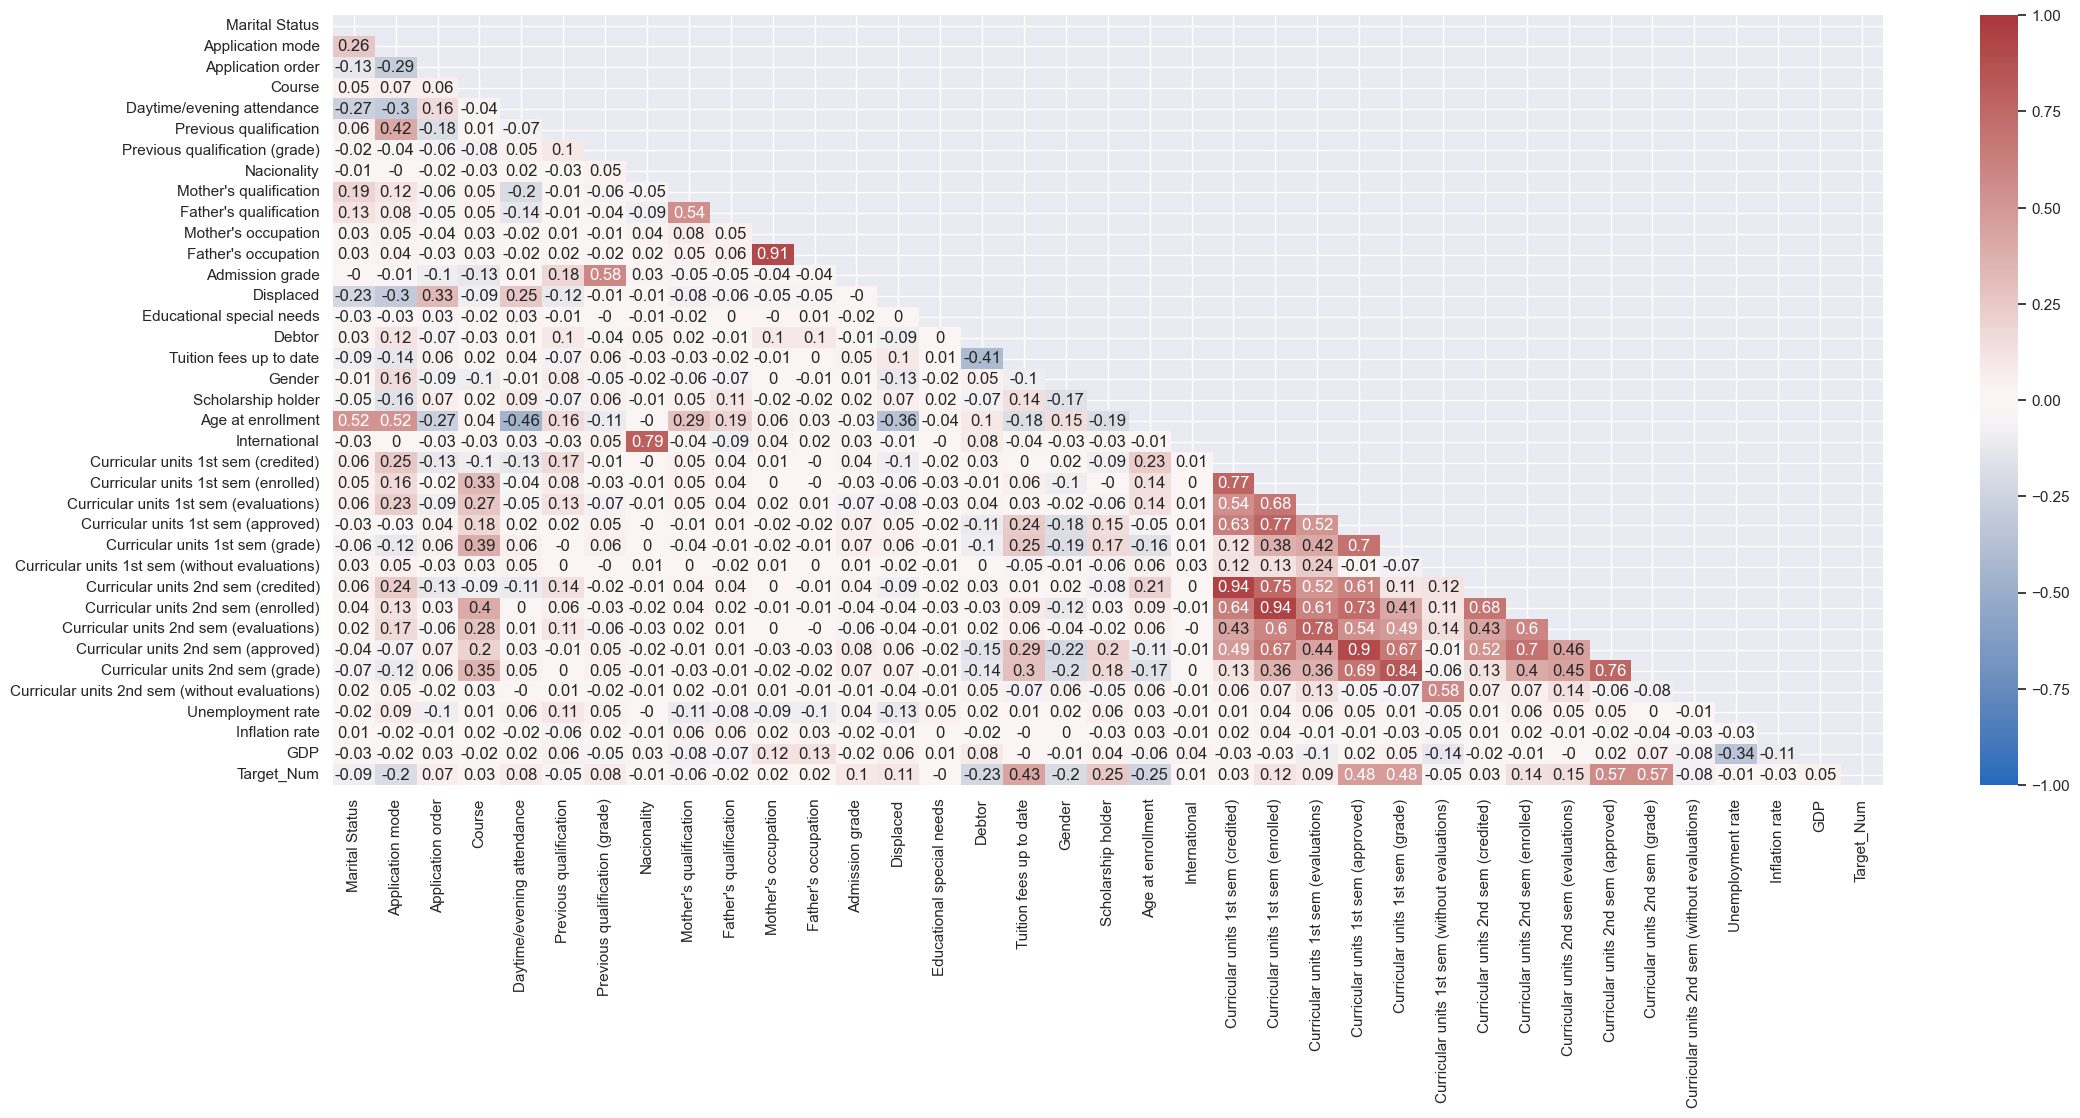

In [604]:
m=df.corr().round(2)

sns.set_theme(rc={"figure.figsize":(25, 10)})
mask=np.triu(np.ones_like(m, dtype=bool))
sns.heatmap(m, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)

In [605]:
# the next step if processor intensive, so reducing columns just to the ones with a correlation above a certain threshold
k_highest = 7
c = df.corrwith(df['Target_Num']).abs().drop('Target_Num')
c.sort_values(ascending=False, inplace=True)
hc = c.head(k_highest).index.tolist()
result = f"### {k_highest} Features with the highest absolute correlation with Target_Num: {hc}"
display(Markdown(result))

### 7 Features with the highest absolute correlation with Target_Num: ['Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'Age at enrollment', 'Scholarship holder']

C:\Users\anitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


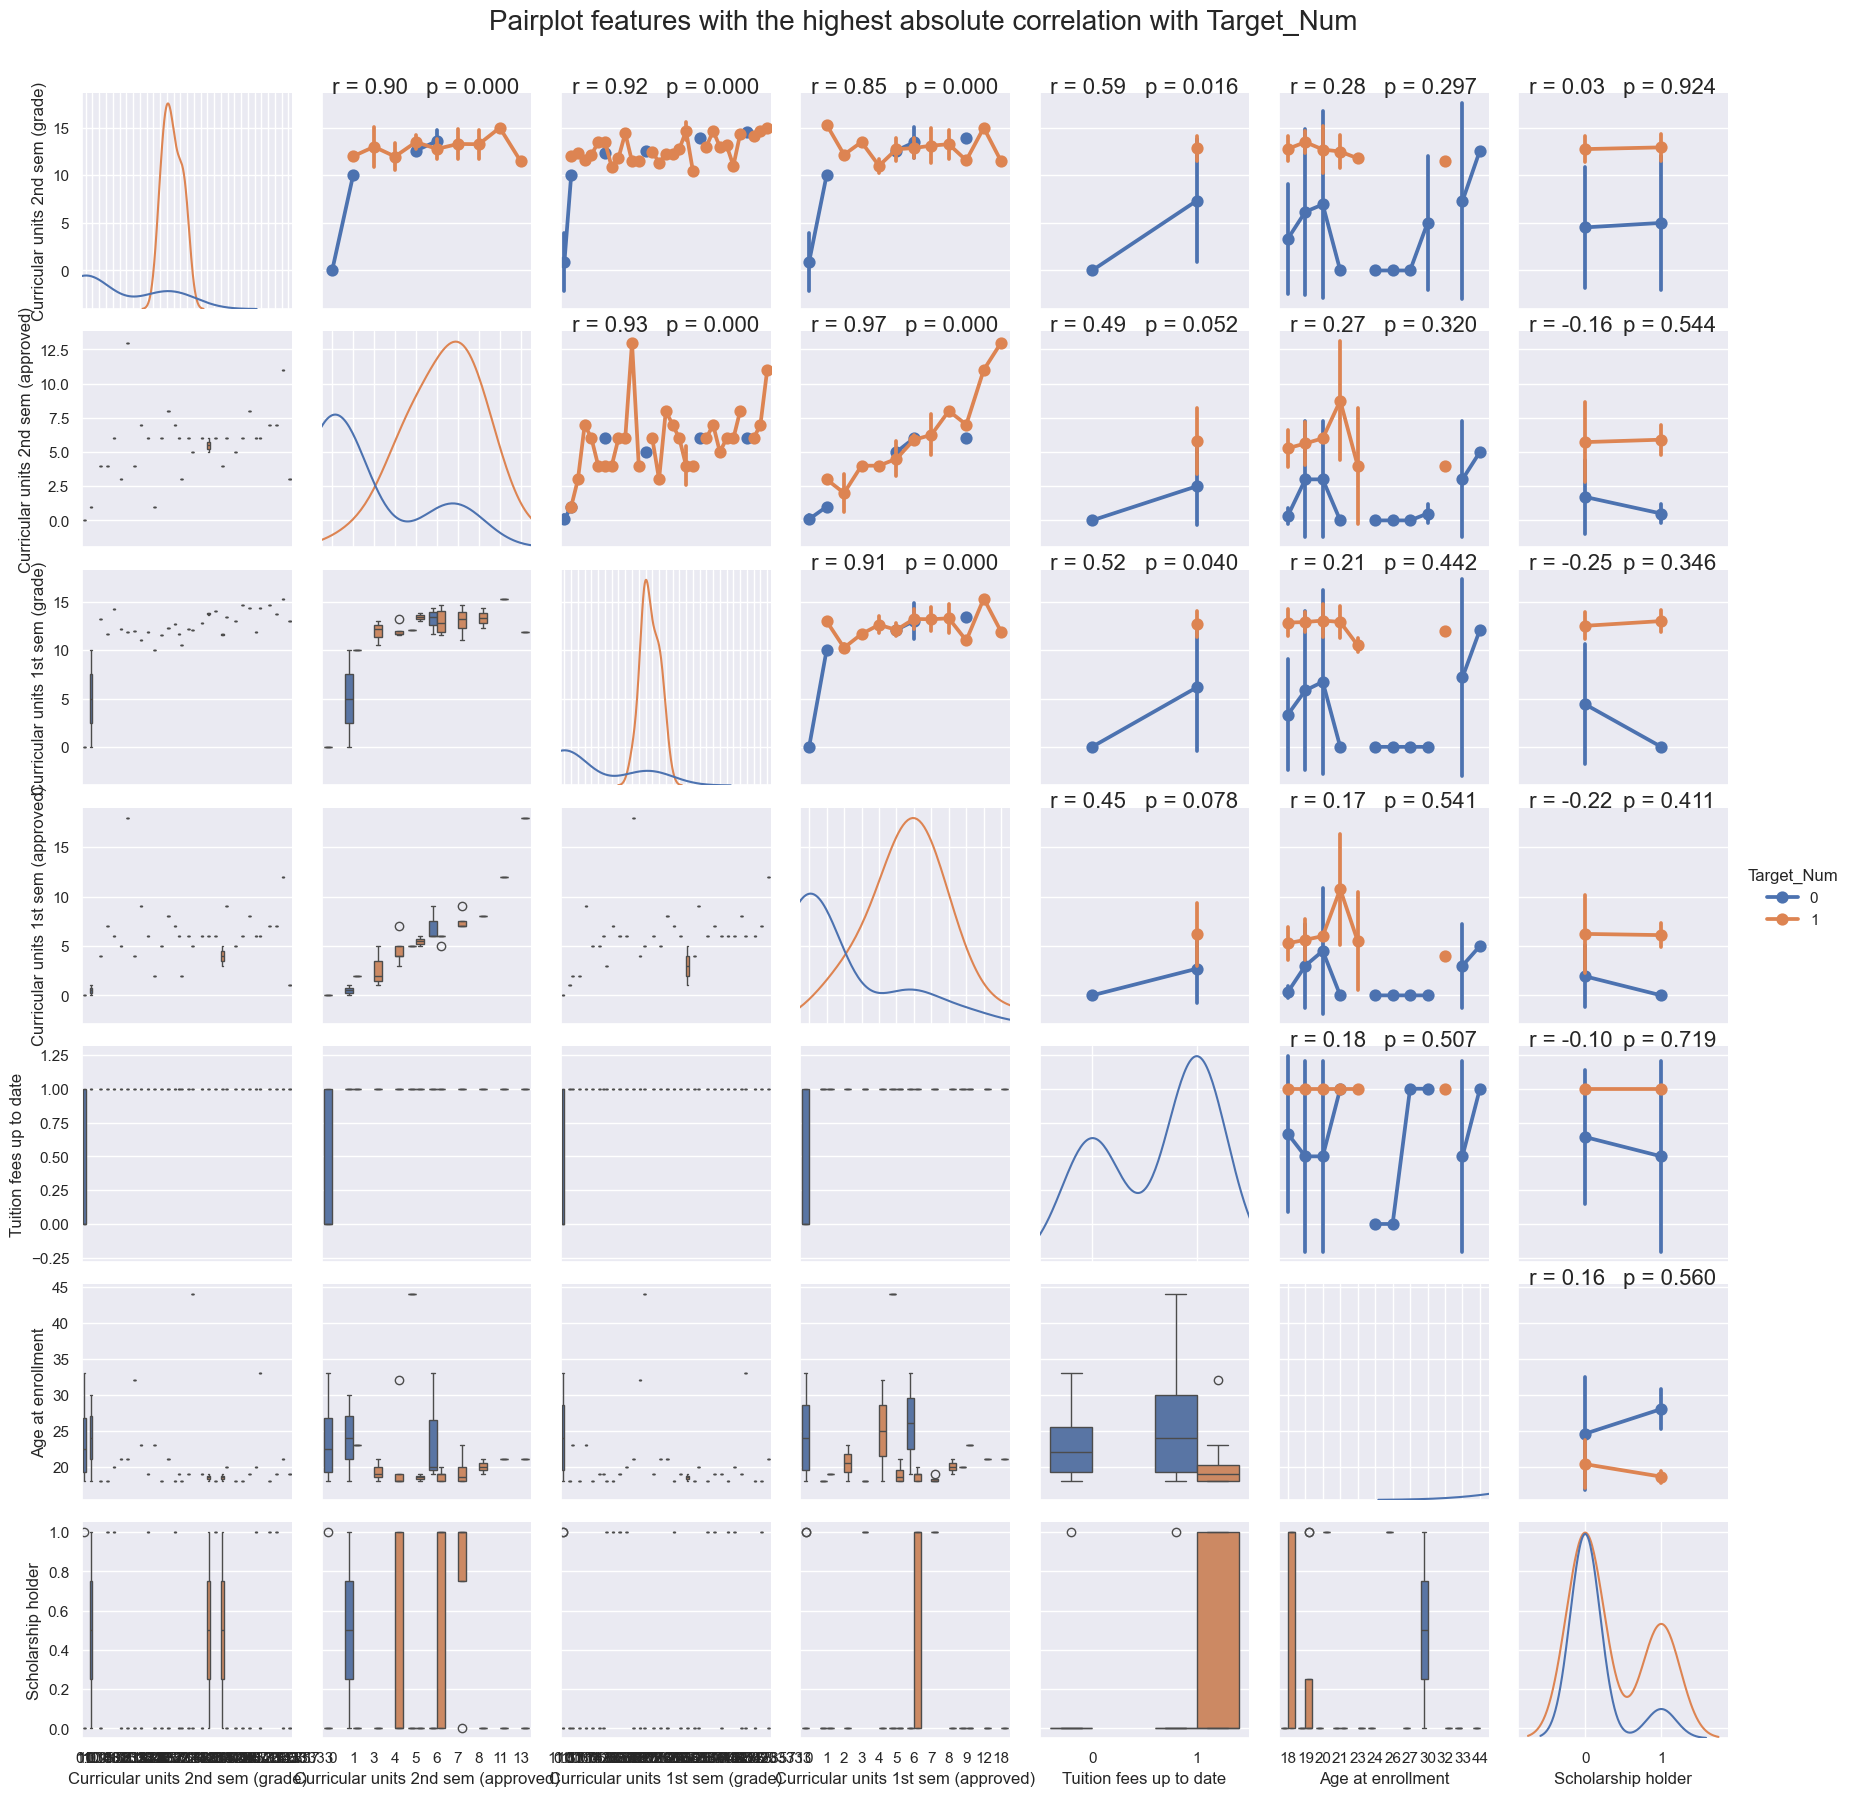

In [608]:
frac = 0.01
np.random.seed(42)

g = sns.PairGrid(df[['Target_Num'] + hc].sample(frac=frac), hue='Target_Num', diag_sharey=False)

plt.suptitle('Pairplot features with the highest absolute correlation with Target_Num', fontsize=20, y=1.03)

# Helper functions to customize the plots down to the feature level
# Note: The hue parameter is needed because Seaborn looks for it in 
#       the signature of the function, and makes wrong assumptions if it's not there
def upper_plot(x, y, hue=None, **kws):
    if x.name == 'BMI': 
        return sns.kdeplot(x=x, y=y, hue=hue, **kws)
    return sns.pointplot(x=x, y=y, hue=hue, errorbar="sd")
def lower_plot(x, y, hue = None, **kws):
    if x.name =='BMI':
        return sns.kdeplot(x=x, y=y, hue=hue, **kws)
    return sns.boxplot(x=x, y=y, hue=hue, **kws)
from scipy.stats import pearsonr
def corrfunc(x, y, **kwargs):
    # To work around a bug in PairGrid where mapped functions are called twice for each cell
    # keep track of previous calls by x, y, and only annotate once per x, y pair
    # using a function-level attribute because globals are just asking for trouble
    # CAVEAT: this helper function is not re-useable outside this cell, because it REMEMBERS
    # Why does it matter it gets called twice? Because pearsonr uses random statistics and often 
    # repeated calls to pearsonr with the exact same data result in slightly different output
    # even if you try setting a random seed.  Try it; it's "fun"(tm) - Laurentius
    if not hasattr(corrfunc, 'called'):
        corrfunc.called = []
    ax = plt.gca()
    sargs = f"{x.name}-{y.name}"
    if sargs not in corrfunc.called:
        corrfunc.called.append(sargs)
        np.random.seed(42)
        (r, p) = pearsonr(x, y)
        ax.annotate("r = {:.2f} ".format(r),
                    xy=(.05, 1.0), xycoords=ax.transAxes, size=16)
        ax.annotate("p = {:.3f}".format(p),
                    xy=(.5, 1.0), xycoords=ax.transAxes, size=16)
    return ax

g.map_upper(upper_plot)
g.map_diag(sns.kdeplot)
g.map_lower(lower_plot)
g.map_upper(corrfunc)
g.add_legend(title='Target_Num')
plt.show()

Test Assumptions - We need to test assumptions depending on the algorithms we select.

Perform transforms - We need to iterate over different transforms and retest assumptions until all assumptionsare met. (quantize, log and scale, one not, discretize, scale, min/max)
